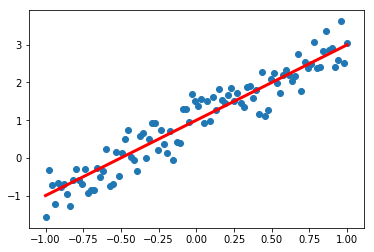

In [8]:
%matplotlib inline    #画图显示在notebook中
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

x_data=np.linspace(-1,1,100)  #等差数列，-1到1分成100份
y_data=x_data*2+1+np.random.randn(*x_data.shape)*0.4  #人为制造噪声
plt.scatter(x_data,y_data)  #散点图
plt.plot(x_data,2*x_data+1,color='r',linewidth=3)  #横坐标，纵坐标，线条颜色，线宽

[1.1332927, 1.7855344]
[1.9208152, 1.0753533]
[1.9872531, 1.0154394]
[1.9928579, 1.0103848]
[1.9933302, 1.0099587]
[1.99337, 1.0099229]
[1.9933732, 1.00992]
[1.9933734, 1.0099199]
[1.9933736, 1.0099196]
[1.9933736, 1.0099196]


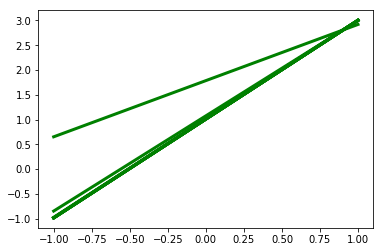

In [35]:
train_epoches=10   #训练轮次
leanning_rate=0.05  #学习率（一般在0.03——0.1之间）
x=tf.placeholder("float",name="x")   #需要feed_dict填充数据
y=tf.placeholder("float",name="y")
w=tf.Variable(1.0,name="w")  #变量
b=tf.Variable(0.0,name="b")
def predict(x,w,b):
    return tf.multiply(x,w)+b       #预测函数
init=tf.global_variables_initializer()  #变量初始化，一定要加
loss_function=tf.reduce_mean(tf.square(y-predict(x,w,b))) #损失函数
optimizer=tf.train.GradientDescentOptimizer(leanning_rate).minimize(loss_function)  #梯度下降优化方法 
with tf.Session() as sess:
    sess.run(init)
    for train in range(train_epoches):
        for xs,ys in zip(x_data,y_data):   
            _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        w0=w.eval()
        b0=b.eval()
        plt.plot(x_data,x_data*w0+b0,color='g',linewidth=3)
        print(sess.run([w,b]))
    